## <font color=blue> Calculus - Velocity and Acceleration

This is part of the series of math algorithms to define 3D shapes as math objects.

### <font color=blue> Summary:

Calculate the velocity (speed) and acceleration given distance traveled and time expended. Usually this is applied to the speed of a runner or the acceleration of an vehicle. 

### <font color=blue> Problem: 
Calculate velocity and acceleration in two ways:
* Distance traveled and time expended is given an expression (function)
* Distance traveled and time expended is given measurements (data points)
    
The example presented is the movement of car from 0 to 60+ miles per hour in
ten seconds (like a Telsa benchmark).
    
### <font color=blue> Process:  
* Distance traveled and time expended is given an expression (function):
    * Take the 1st derivative --- it is the velocity
    * Take the 2nd derivative --- it is the acceleration
* Distance traveled and time expended is given measurements (data points):
    * Use slope of the distance data (change of distance / change of time) to provide velocity at points of time.
    * Use slope of the velocity data (change of velocity / change of time) to provide acceleration at points of time.
    
                                                                
### <font color=blue> Notes: 
* Section 1 provides the step-by-step algorithm with plots and interim results.  
* Section 2 presents the algorithm in more concise fashion that can be easily copied and used. 
* Section 3 compares the results of the above two sections (methods)

### <font color=blue> Medical implications or application:
    Size of tumor over time might be another application. The rate of a DNA mutation might be another example.


## <font color=purple> SECTION 1: Velocity and Acceleration from an Expression 
    (distance traveled and time expended are from a function)

In [1]:
import numpy as np
import scipy as s
import matplotlib.pyplot as plt
%matplotlib inline


### <font color=blue>Key Inputs: expression and interval for evaluation

In [2]:
from sympy import pprint, init_printing
from sympy import *
init_printing(use_unicode=True)
from sympy import Symbol, Eq,  solveset, S
import math

t= Symbol('t')                                # define t (time) as a symbol

In [3]:
d = t/9 + sin(t)/9                          # function .5*t +.5*sin(t) 

t_min = 0                                   # specify interval (min)
t_max = 10                                   # specify interval (max)
print("Expression:       d =  ", d, "\nInterval (time): ", t_min,',', t_max)
print('\nwhere d = distance and t = time')

Expression:       d =   t/9 + sin(t)/9 
Interval (time):  0 , 10

where d = distance and t = time


### <font color=blue>Generate some data and plot the expression for visualization

In [4]:
# Generate some data 
print("Expression:",d)
print( "Interval:  ", t_min,',', t_max)

# Create data for plot of function
t_data = [x for x in np.linspace(start = t_min, stop = t_max, num = 101)]
d_data = []
for x in t_data:
    y = d.subs(t, x)            # Substitution, uses value of x for t in expression
    d_data.append(y)

Expression: t/9 + sin(t)/9
Interval:   0 , 10


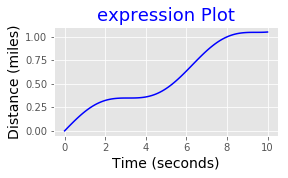

In [5]:
# Plot data    
plt.figure(figsize=(4,2))                       # resets to new figure   
plt.style.use('ggplot')
plt.xlabel('Time (seconds)', fontsize = 14, color='black')
plt.ylabel('Distance (miles)', fontsize = 14, color='black')
plt.title("expression Plot", loc='center', fontsize=18, color='b')
plt.plot(t_data,d_data, color='blue')
# for x_data in [-2,0,2,4,5]: print(x_data, expr.subs([(x, x_data)]) )

### <font color=blue>Take a derivative of f(x), the 1st derivative (the velocity), with respect to x and plot derivative:

In [6]:
from sympy import Derivative

print("Expression (distance as function of time):",d)
deriv1= Derivative(d, t)                   # take 1st derivative
print('Derivative #1 (velocity): ', deriv1.doit())          #  1st derivative 

value_der1 = deriv1.doit().subs({t:4})            # derivative at t = 4
value_expr = d.subs([(t, 4)])              # function at t = 4
# sometimes the methods produce an expression (e.g. 0.5*cos(4) + 0.5) that needs to be convert to float
value_der1 = float(np.format_float_scientific(value_der1, precision=4, unique=False,  trim='k'))  # convert
value_expr = float(np.format_float_scientific(value_expr, precision=4, unique=False,  trim='k'))  # convert

print('\nAt t = 4 seconds, the Value of expression (distance) is {} miles\n  and Value of deriviative #1 (velocity) is {} miles/sec or {:.2f} miles/hr'.format(
    value_expr,value_der1,value_der1*3600))
value_der1 = deriv1.doit().subs({t:10})             # derivative at t = 0
value_expr = d.subs([(t, 10)])              # function at t = 0
value_der1 = float(np.format_float_scientific(value_der1, precision=4, unique=False,  trim='k'))  # convert
value_expr = float(np.format_float_scientific(value_expr, precision=4, unique=False,  trim='k'))  # convert
print('\nAt t = 10 seconds, the Value of expression (distance) is {} miles\n  and Value of deriviative #1 (velocity) is {} miles/sec or {:.2f} miles/hr'.format(
    value_expr,value_der1,value_der1*3600))

Expression (distance as function of time): t/9 + sin(t)/9
Derivative #1 (velocity):  cos(t)/9 + 1/9

At t = 4 seconds, the Value of expression (distance) is 0.36036 miles
  and Value of deriviative #1 (velocity) is 0.038484 miles/sec or 138.54 miles/hr

At t = 10 seconds, the Value of expression (distance) is 1.0507 miles
  and Value of deriviative #1 (velocity) is 0.017881 miles/sec or 64.37 miles/hr


### <font color=blue>Plot 1st derivative on same chart as expression for visulization

In [7]:
# Create the derivative #1 plot data (function data already done)
x_der1 = [x for x in np.linspace(start = t_min, stop = t_max, num = 31)]
y_der1 = []
for x_data in x_der1:
    y = deriv1.doit().subs({t:x_data})             # derivative at x = ....
    y_der1.append(y)

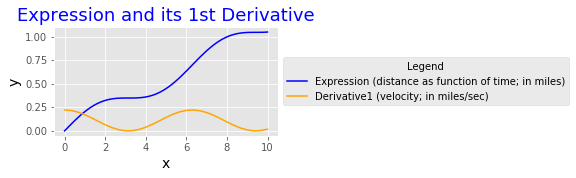

In [8]:
plt.figure(figsize=(4,2))                       # resets to new figure
plt.title('Expression and its 1st Derivative', loc='center', fontsize=18, color='b')
line_chart1 = plt.plot(t_data, d_data, color = 'blue')
line_chart2 = plt.plot(x_der1, y_der1, color = 'orange')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.legend(['Expression (distance as function of time; in miles)', 'Derivative1 (velocity; in miles/sec)'], loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')

plt.show()

### <font color=blue>Take 2nd derivative of expression to get acceleration (which is a function)


In [9]:
print('Derivative 1 (velocity): ', deriv1.doit())          # Use 1st derivative

value_der1 = deriv1.doit().subs({t:10})             # derivative at t = 10
value_der1 = float(np.format_float_scientific(value_der1, precision=4, unique=False,  trim='k'))  # convert
print('Derivative 1 (velocity) at t=10:  {:.3f} miles per second, or {:.3f} miles per hour.'.format(
    value_der1,value_der1*3600))
value_der1 = deriv1.doit().subs({t:4})             # derivative at t = 10
value_der1 = float(np.format_float_scientific(value_der1, precision=4, unique=False,  trim='k'))  # convert
print('Derivative 1 (velocity) at t=4:  {:.3f} miles per second, or {:.3f} miles per hour.'.format(
    value_der1,value_der1*3600))

deriv2= Derivative(deriv1.doit(), t)                   # take 2nd derivative from 1st derivative
print('\nDerivative 2 (acceleration): ', deriv2.doit())
print('Derivative 2 (acceleration) at t=10:  {:.3f}'.format(float(deriv2.doit().subs({t:10}))))
print('Derivative 2 (acceleration) at t=4:  {:.3f}'.format(float(deriv2.doit().subs({t:4}))))

Derivative 1 (velocity):  cos(t)/9 + 1/9
Derivative 1 (velocity) at t=10:  0.018 miles per second, or 64.372 miles per hour.
Derivative 1 (velocity) at t=4:  0.038 miles per second, or 138.542 miles per hour.

Derivative 2 (acceleration):  -sin(t)/9
Derivative 2 (acceleration) at t=10:  0.060
Derivative 2 (acceleration) at t=4:  0.084


In [10]:
# Create the derivative #2 plot data (function data already done)
x_der2 = [x for x in np.linspace(start = t_min, stop = t_max, num = 31)]
y_der2 = []
for x_data in x_der2:
    y= deriv2.doit().subs({t:x_data})         # derivative at x = ....
    y = round(float(y),2)            
    y_der2.append(y)

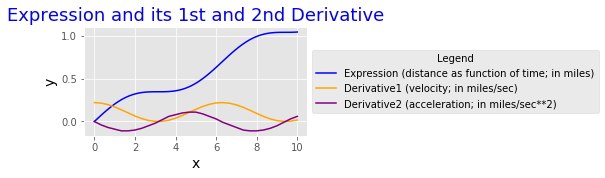

In [11]:
# Plot derivative 1 and 2
plt.figure(figsize=(4,2))                       # resets to new figure
plt.title('Expression and its 1st and 2nd Derivative', loc='center', fontsize=18, color='b')
line_chart1 = plt.plot(t_data, d_data, color = 'blue')
line_chart2 = plt.plot(x_der1, y_der1, color = 'orange')
line_chart3 = plt.plot(x_der2, y_der2, color = 'purple')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.legend(['Expression (distance as function of time; in miles)',
            'Derivative1 (velocity; in miles/sec)','Derivative2 (acceleration; in miles/sec**2)'], 
           loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')
plt.show()

## <font color=purple> SECTION 2: Velocity and Acceleration from Data 
    (distance traveled and time expended are from data points)

### <font color=blue> Create Data 

In [12]:
# Create data (assume as a in above)
import pandas as pd
t_data = [round(x,2) for x in np.linspace(start = t_min, stop = t_max, num = 101)]
d_data = []
for x in t_data:
    y = d.subs(t, x)            # Substitution, uses value of x for t in expression
    y = float(np.format_float_scientific(y, precision=2, unique=False,  trim='k'))  # convert
    d_data.append(y)                  # exec and return
# Create dataframe for data to facilitate manipulation
df_data = pd.DataFrame(columns=['Time','Distance'])
df_data['Time'] = t_data
df_data['Distance'] = d_data

### <font color=blue> Calculate Velocity

In [13]:
df_data['Velocity'] = (df_data.Distance.shift(-3)-df_data.Distance.shift(3))/(df_data.Time.shift(-3)-df_data.Time.shift(3))

### <font color=blue> Calculate Acceleration

In [14]:
df_data['Acceleration'] = (df_data.Velocity.shift(-3)-df_data.Velocity.shift(3))/(df_data.Time.shift(-3)-df_data.Time.shift(3))
df_data.head(10)

,Time,Distance,Velocity,Acceleration
0,0.0,0.0000,NaN,NaN
1,0.1,0.0222,NaN,NaN
2,0.2,0.0443,NaN,NaN
3,0.3,0.0662,0.215000,NaN
4,0.4,0.0877,0.211333,NaN
5,0.5,0.1090,0.207833,NaN
6,0.6,0.1290,0.201333,-0.058333
7,0.7,0.1490,0.195500,-0.066111
8,0.8,0.1690,0.186667,-0.079722
9,0.9,0.1870,0.180000,-0.085556


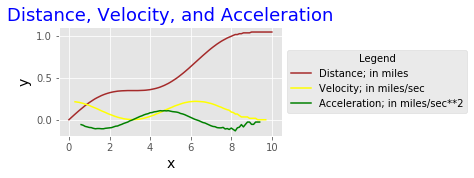

In [15]:
# Plot data, velocity, and acceleration
plt.figure(figsize=(4,2))                       # resets to new figure
plt.title('Distance, Velocity, and Acceleration', loc='center', fontsize=18, color='b')
line_chart1 = plt.plot(df_data['Time'], df_data['Distance'], color = 'brown')
line_chart2 = plt.plot(df_data['Time'], df_data['Velocity'], color = 'yellow')
line_chart3 = plt.plot(df_data['Time'], df_data['Acceleration'], color = 'green')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.legend(['Distance; in miles',
            'Velocity; in miles/sec','Acceleration; in miles/sec**2'], 
           loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')
plt.show()


## <font color=purple> SECTION 3: Compare results of Section 1 and Section 2 Methods

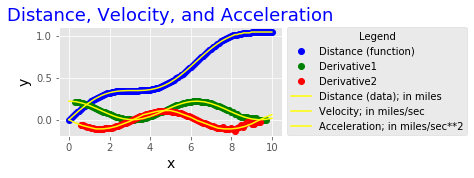

Thick Lines are from Section 1 (function and derivatives); 
Yellow inner lines are from Section 2 (data)
Note: Thickness of line is for visualization purposes only.


In [17]:
# Plot data, velocity, and acceleration from Section 1 and 2 on same chart
plt.figure(figsize=(4,2))                       # resets to new figure
plt.title('Distance, Velocity, and Acceleration', loc='center', fontsize=18, color='b')
line_chart1 = plt.plot(df_data['Time'], df_data['Distance'],'bo' )
line_chart2 = plt.plot(df_data['Time'], df_data['Velocity'], 'go')
line_chart3 = plt.plot(df_data['Time'], df_data['Acceleration'], 'ro')
line_chart4 = plt.plot(t_data, d_data, color = 'yellow',)
line_chart5 = plt.plot(x_der1, y_der1, color = 'yellow')
line_chart6 = plt.plot(x_der2, y_der2, color = 'yellow')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.legend(['Distance (function)', 'Derivative1','Derivative2',
            'Distance (data); in miles','Velocity; in miles/sec','Acceleration; in miles/sec**2'], 
           loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')
plt.show()
print('Thick Lines are from Section 1 (function and derivatives); \nYellow inner lines are from Section 2 (data)')
print('Note: Thickness of line is for visualization purposes only.')